In [1]:
from pynq import Overlay

In [2]:
ol = Overlay('./overlay/krnl_resize.xclbin')

In [3]:
krnl_resize = ol.resize_accel_1

In [4]:
krnl_resize.register_map

RegisterMap {
  CTRL = Register(AP_START=0, AP_DONE=0, AP_IDLE=1, AP_READY=0, AUTO_RESTART=0, AP_CONTINUE=0),
  img_inp = Register(value=0),
  img_out = Register(value=0),
  rows_in = Register(value=0),
  cols_in = Register(value=0),
  rows_out = Register(value=0),
  cols_out = Register(value=0)
}

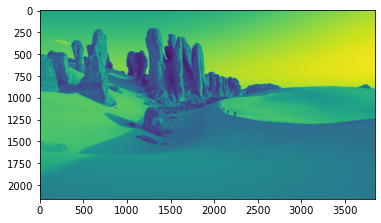

In [5]:
import cv2
import numpy as np
image_bgr = cv2.imread('./image/sahara.jpg')
image_in  = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2GRAY)   # 转换为gray
import matplotlib.pyplot as plt
plt.imshow(image_in)

In [6]:
image_in.shape

(2160, 3840)

In [7]:
reduce_rate = 2
rows_out = int(image_in.shape[0]/reduce_rate)
cols_out = int(image_in.shape[1]/reduce_rate)
rows_out,cols_out

(1080, 1920)

In [8]:
from pynq import allocate
import numpy as np

kern_image_in  = allocate(shape=(1*image_in.shape[0] *image_in.shape[1]), dtype=np.uint8)
kern_image_out = allocate(shape=(1*rows_out*cols_out), dtype=np.uint8)

In [9]:
kern_image_in[:] = image_in.reshape(1*image_in.shape[0] * image_in.shape[1])

In [10]:
kern_image_in.flush()

In [11]:
kern_image_in

PynqBuffer([136, 140, 132, ...,  95,  97,  98], dtype=uint8)

In [12]:
image_in[0,0]

136

In [13]:
image_in.shape

(2160, 3840)

In [14]:
krnl_resize.register_map.img_inp = kern_image_in.physical_address
krnl_resize.register_map.img_out = kern_image_out.physical_address
krnl_resize.register_map.rows_in = image_in.shape[0]
krnl_resize.register_map.cols_in = image_in.shape[1]

krnl_resize.register_map.rows_out = rows_out
krnl_resize.register_map.cols_out = cols_out

In [15]:
krnl_resize.register_map.CTRL.AP_DONE

0

In [16]:
krnl_resize.register_map.CTRL.AP_START = 1

In [17]:
krnl_resize.register_map.CTRL.AP_DONE

1

In [18]:
kern_image_out.invalidate()

In [19]:
image_out = (np.array(kern_image_out)).reshape(rows_out,cols_out,1)

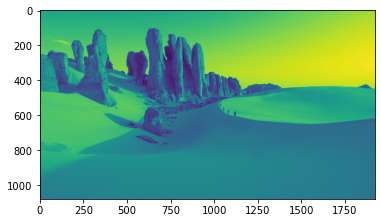

In [20]:
plt.imshow(image_out)

In [21]:
image_out.shape

(1080, 1920, 1)